In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
import xgboost as xgb
import lightgbm as lgb

In [4]:
train = pd.read_csv('train_df.csv', index_col='id')
test = pd.read_csv('test_df.csv', index_col='id')
y = train['y']
train = train.drop('y', axis=1)

In [5]:
def making_new_features(data):
    mean_list=[]
    std_list=[]
    min_list=[]
    max_list=[]
    median_list=[]
    
    for i in range(len(data)):
        mean_list.append(np.mean(data.loc[i+1]))
        std_list.append(np.std(data.loc[i+1]))
        min_list.append(np.min(data.loc[i+1]))
        max_list.append(np.max(data.loc[i+1]))
        median_list.append(np.median(data.loc[i+1]))
        
    data['mean'] = mean_list
    data['std'] = std_list 
    data['max'] = max_list 
    data['min'] = min_list 
    data['median'] = median_list 
        
    return data



def make_rollig(data, step):
    
    for i in range(1, 500-step):
        data['diff_'+str(step)+str(i)] = data['att'+str(i+step)] - data['att'+str(i)]
        data['rolling_mean'+str(step)+str(i)] = np.mean(data[i:i+step])
    return data

In [6]:
train = making_new_features(train)
test = making_new_features(test)

In [7]:
train = make_rollig(train, 10)
train = make_rollig(train, 20)
train = make_rollig(train, 25)
train = make_rollig(train, 50)
train = make_rollig(train, 100)

In [8]:
test = make_rollig(test, 10)
test = make_rollig(test, 20)
test = make_rollig(test, 25)
test = make_rollig(test, 50)
test = make_rollig(test, 100)

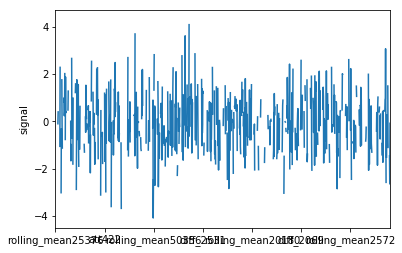

In [21]:
#plt.figure(figsize(15,7))
(train.iloc[19]).sample(frac=0.2).plot()
plt.ylabel("signal")
plt.show()

In [9]:
train_data,test_data,train_label, test_label = train_test_split(train, y, random_state=4556, test_size=0.2)

In [10]:
train_data.shape

(2908, 7375)

In [11]:
clf = xgb.XGBClassifier(max_depth=8,
                           n_estimators=300,
                           objective='binary:logistic',
                           seed=1)
clf.fit(train_data, train_label, eval_metric='auc', verbose=True,
            eval_set=[(test_data, test_label)], early_stopping_rounds=100)
y_pre = clf.predict(test_data)
y_pro = clf.predict_proba(test_data)[:, 1]
print ("AUC Score : %f" % roc_auc_score(test_label, y_pro))

[0]	validation_0-auc:0.58407
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.667895
[2]	validation_0-auc:0.691629
[3]	validation_0-auc:0.710484
[4]	validation_0-auc:0.747687
[5]	validation_0-auc:0.75785
[6]	validation_0-auc:0.769403
[7]	validation_0-auc:0.785197
[8]	validation_0-auc:0.790771
[9]	validation_0-auc:0.799002
[10]	validation_0-auc:0.802048
[11]	validation_0-auc:0.807808
[12]	validation_0-auc:0.816327
[13]	validation_0-auc:0.823273
[14]	validation_0-auc:0.833091
[15]	validation_0-auc:0.838186
[16]	validation_0-auc:0.83963
[17]	validation_0-auc:0.847831
[18]	validation_0-auc:0.852404
[19]	validation_0-auc:0.853878
[20]	validation_0-auc:0.854036
[21]	validation_0-auc:0.856455
[22]	validation_0-auc:0.857173
[23]	validation_0-auc:0.858851
[24]	validation_0-auc:0.863825
[25]	validation_0-auc:0.865253
[26]	validation_0-auc:0.868571
[27]	validation_0-auc:0.872018
[28]	validation_0-auc:0.879516
[29]	validation_0-auc:0.879478
[30]	validation_0-

[259]	validation_0-auc:0.948904
[260]	validation_0-auc:0.948927
[261]	validation_0-auc:0.94873
[262]	validation_0-auc:0.948541
[263]	validation_0-auc:0.948662
[264]	validation_0-auc:0.948564
[265]	validation_0-auc:0.948405
[266]	validation_0-auc:0.948367
[267]	validation_0-auc:0.948488
[268]	validation_0-auc:0.948352
[269]	validation_0-auc:0.948602
[270]	validation_0-auc:0.948745
[271]	validation_0-auc:0.94867
[272]	validation_0-auc:0.94876
[273]	validation_0-auc:0.948859
[274]	validation_0-auc:0.948889
[275]	validation_0-auc:0.948783
[276]	validation_0-auc:0.94898
[277]	validation_0-auc:0.949138
[278]	validation_0-auc:0.949123
[279]	validation_0-auc:0.94901
[280]	validation_0-auc:0.949063
[281]	validation_0-auc:0.94901
[282]	validation_0-auc:0.949063
[283]	validation_0-auc:0.949184
[284]	validation_0-auc:0.949358
[285]	validation_0-auc:0.949494
[286]	validation_0-auc:0.949637
[287]	validation_0-auc:0.949781
[288]	validation_0-auc:0.950076
[289]	validation_0-auc:0.950189
[290]	validati

C:\Users\vpd_l\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC Score : 0.950438


In [12]:
lgb_train = lgb.Dataset(train_data,train_label)
lgb_valid = lgb.Dataset(test_data, test_label, reference=lgb_train)

params = {
    'verbose': 0,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc'],
    'num_leaves': 2 ** 3,
    'learning_rate': 0.07,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'min_child_weight': 20,
    'bagging_freq': 10,
     'seed': 7
                }


gbm = lgb.train(params, lgb_train,
            num_boost_round=10000,
            valid_sets=[lgb_train, lgb_valid],
            verbose_eval=20,
            early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[20]	training's auc: 0.859112	valid_1's auc: 0.724732
[40]	training's auc: 0.925189	valid_1's auc: 0.768027
[60]	training's auc: 0.95815	valid_1's auc: 0.825314
[80]	training's auc: 0.972532	valid_1's auc: 0.851943
[100]	training's auc: 0.982343	valid_1's auc: 0.874089
[120]	training's auc: 0.989247	valid_1's auc: 0.887664
[140]	training's auc: 0.993039	valid_1's auc: 0.89709
[160]	training's auc: 0.995694	valid_1's auc: 0.899342
[180]	training's auc: 0.997322	valid_1's auc: 0.904482
[200]	training's auc: 0.998421	valid_1's auc: 0.907491
[220]	training's auc: 0.999173	valid_1's auc: 0.913439
[240]	training's auc: 0.999528	valid_1's auc: 0.916062
[260]	training's auc: 0.9997	valid_1's auc: 0.918579
[280]	training's auc: 0.999804	valid_1's auc: 0.918798
[300]	training's auc: 0.999904	valid_1's auc: 0.921338
[320]	training's auc: 0.99996	valid_1's auc: 0.922336
[340]	training's auc: 0.999962	valid_1's auc: 0.923628
[360]	train

In [13]:
submit = pd.read_csv('SampleSubmission.csv', index_col='Id')

In [14]:
y_pred = clf.predict_proba(test)[:, 1]
y_pred1 = gbm.predict(test)

In [18]:
submit.y = y_pred1

In [15]:
# submit.y = y_pred1

In [19]:
submit.head()

,y
Id,
0,0.852954
1,0.640562
2,0.856307
3,0.627324
4,0.590793


In [20]:
submit.to_csv('12.csv')